In [5]:
import numpy as np
import pandas as pd

a = pd.DataFrame([[1,2,3,4],[5,6,7,8]])

In [7]:
b=a.values.reshape(-1,1)

In [8]:
for i, val in enumerate(b):
    print(i,val)

0 [1]
1 [2]
2 [3]
3 [4]
4 [5]
5 [6]
6 [7]
7 [8]


In [2]:
# Importing the libraries
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import pylab

In [3]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [3]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [4]:
# Remove missing data
pggm = pggm.dropna()

In [5]:

pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392


In [13]:
X = pggm.iloc[:, 8] 
y = pggm.iloc[:, 11]

In [14]:
X.head()

0    0.000402
1    0.000422
2    0.000563
3    0.005174
4    0.000616
Name: Weight, dtype: float64

In [15]:
X = pggm['Weight']

In [16]:
X.head()

0    0.000402
1    0.000422
2    0.000563
3    0.005174
4    0.000616
Name: Weight, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

NameError: name 'X' is not defined

In [7]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [19]:

regressor.fit(X=X_train.values.reshape(-1, 1), y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [21]:
regressor.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

0.9956088217259058

Text(0, 0.5, 'Market Cap USD')

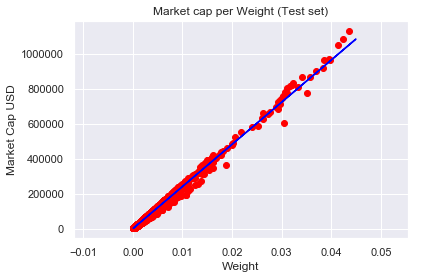

In [25]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train.values.reshape(-1, 1)), color='blue')
plt.title('Market cap per Weight (Test set)')
plt.xlabel('Weight')
plt.ylabel('Market Cap USD')

In [27]:
# Multiple Linear Regression
X = pggm
X['constant'] = np.ones(len(X)).astype(int)
X.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,constant
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


In [5]:
X1 = pggm['BP']
y1 = pggm['Universe_Returns_F1W']

In [10]:
regressor.fit(X1.values.reshape(-1,1), y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

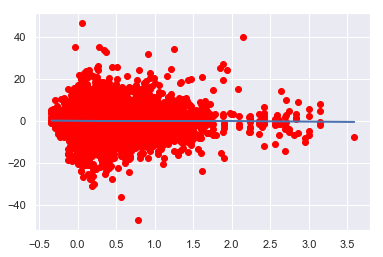

In [12]:
plt.scatter(X1, y1, c='red')
plt.plot(X1, regressor.predict(X1.values.reshape(-1,1)))

In [28]:
new_X = pggm[['Weight','constant']]

In [29]:
new_X['Weight_squared'] = new_X['Weight']**2

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
new_X.head()

,Weight,constant,Weight_squared
0,0.000402,1,1.616040e-07
1,0.000422,1,1.780840e-07
2,0.000563,1,3.169690e-07
3,0.005174,1,2.677028e-05
4,0.000616,1,3.794560e-07


In [31]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog=new_X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Market_Cap_USD   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.982e+06
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:20:33   Log-Likelihood:            -3.7858e+05
No. Observations:               38026   AIC:                         7.572e+05
Df Residuals:                   38023   BIC:                         7.572e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Weight          2.381e+07   1.69e+04   1409.478      0.000    2.38e+07    2.38e+07
constant         188.1021     33.371      5.637      0.000     122.695     253.510
Weight_squared   1.44e+07   6.49e+05     22.175      0.000    1.31e+07    1.57e+07
==============================================================================
Omnibus:                    58014.520   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         96619804.203
Skew:                          -9.079   Prob(JB):                         0.00
Kurtosis:                     249.275   Cond. No.                     2.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Sales Growth ')

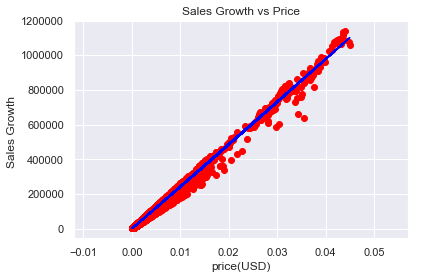

In [33]:
plt.scatter(new_X['Weight'], y, color='red')
plt.plot(new_X['Weight'], regressor_OLS.predict(new_X), color='blue')
plt.title('Sales Growth vs Price')
plt.xlabel('price(USD)')
plt.ylabel('Sales Growth ')

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X['Weight'].values.reshape(-1, 1))
poly_reg.fit(x_poly, y)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [81]:
# SVM regression

X = pggm.iloc[:, 8].values.reshape(-1, 1)
y = pggm.iloc[:, 11] .values.reshape(-1, 1)

In [82]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [83]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [84]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
X_test = sc_X.fit_transform(X_test)
y_pred = regressor.predict(X_test)

In [86]:
y_pred

array([-0.07401329,  1.97016076, -0.18750209, ..., -0.45506054,
        0.0198729 ,  0.22656008])

In [87]:
yt = sc_y.inverse_transform(y_pred)
yt[:20]

array([ 33292.63721016, 186286.29434763,  24798.70940811,   6395.19917035,
        10976.77234842,  16974.00016017,   5031.02288698,  11182.68574968,
        29328.80423587,   6755.54762256,   8093.98473076,   2868.93217375,
        35557.68462404,  26523.23414368,  62274.94843776,   5494.32803982,
         2740.23629795, 138771.77700649,  40782.73718106,  15712.78057744])

In [88]:
y_test[:20]

array([[ 35607.926 ],
       [174530.06  ],
       [ 26316.324 ],
       [ 10408.042 ],
       [ 14240.248 ],
       [ 20535.84  ],
       [  8903.458 ],
       [ 14183.2295],
       [ 28348.543 ],
       [ 10671.479 ],
       [ 11552.498 ],
       [  6710.0967],
       [ 37189.383 ],
       [ 29001.125 ],
       [ 62951.418 ],
       [  9123.779 ],
       [  7088.512 ],
       [132907.5   ],
       [ 42416.44  ],
       [ 18179.031 ]])

In [89]:
y_test = sc_y.fit_transform(y_test)
regressor.score(X_test, y_test)

0.993711144066698

In [90]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf',epsilon=1.0)
regressor.fit(X_train, y_train)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
y_pred = regressor.predict(X_test)

In [92]:
yt = sc_y.inverse_transform(y_pred)
yt[:20]

array([ 74089.94133547, 204982.21696041,  66625.88559132,  65288.50300491,
        63234.9673089 ,  63093.40893793,  66250.16401141,  63183.8151127 ,
        70222.4563267 ,  65061.88357047,  64318.97872409,  68116.04087487,
        76542.54916774,  67878.64932625, 110086.30170755,  65905.05262503,
        68240.50238531, 171353.86790828,  82703.09788538,  62899.54416298])

In [94]:
y_t = sc_y.inverse_transform(y_test)
y_t[:20]

array([[ 35607.926 ],
       [174530.06  ],
       [ 26316.324 ],
       [ 10408.042 ],
       [ 14240.248 ],
       [ 20535.84  ],
       [  8903.458 ],
       [ 14183.2295],
       [ 28348.543 ],
       [ 10671.479 ],
       [ 11552.498 ],
       [  6710.0967],
       [ 37189.383 ],
       [ 29001.125 ],
       [ 62951.418 ],
       [  9123.779 ],
       [  7088.512 ],
       [132907.5   ],
       [ 42416.44  ],
       [ 18179.031 ]])

In [95]:
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X.reshape(-1, 1), y.reshape(-1, 1), cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -1789.060 (1722.322)


In [96]:
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X.reshape(-1, 1), y.reshape(-1, 1), cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -30721633.422 (56670091.166)


In [97]:
scoring = 'r2'
results = model_selection.cross_val_score(model, X.reshape(-1, 1), y.reshape(-1, 1), cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.992 (0.017)
